Import dan Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Load Dataset

In [2]:
data_csv = r"E:\DragonEye\dataset\graded_features.csv"

df = pd.read_csv(data_csv)

print("Kolom tersedia:", df.columns)
df.head()

Kolom tersedia: Index(['filename', 'length_cm', 'diameter_cm', 'weight_est_g', 'ratio_ld',
       'ratio', 'length_norm', 'diameter_norm', 'weight_norm', 'ratio_norm',
       'fuzzy_score', 'final_grade', 'label_asli'],
      dtype='object')


,filename,length_cm,diameter_cm,weight_est_g,ratio_ld,ratio,length_norm,diameter_norm,weight_norm,ratio_norm,fuzzy_score,final_grade,label_asli
0,A_01.jpg,14.832,12.274,509.607,1.2085,1.208408,0.995670,0.838336,0.779915,0.589461,90.039295,A,A
1,A_02.jpg,13.729,13.429,564.745,1.0223,1.022340,0.877465,0.958091,0.867662,0.052397,40.592440,A,A
2,A_03.jpg,14.876,13.588,626.488,1.0948,1.094790,1.000000,0.974577,0.965919,0.261515,54.563206,A,A
3,A_04.jpg,14.709,14.250,681.231,1.0322,1.032211,0.982489,1.000000,1.000000,0.080888,43.403740,A,A
4,A_05.jpg,14.391,14.241,665.694,1.0105,1.010533,0.948410,1.000000,1.000000,0.018319,42.099185,A,A


Evaluasi Akurasi & Confusion Matrix

File yang dibaca: E:\DragonEye\dataset\graded_features.csv
Kolom yang ada: ['filename', 'length_cm', 'diameter_cm', 'weight_est_g', 'ratio_ld', 'ratio', 'length_norm', 'diameter_norm', 'weight_norm', 'ratio_norm', 'fuzzy_score', 'final_grade', 'label_asli']
   filename label_asli final_grade
0  A_01.jpg          A           A
1  A_02.jpg          A           A
2  A_03.jpg          A           A
3  A_04.jpg          A           A
4  A_05.jpg          A           A
===== EVALUASI GRADE =====
Jumlah baris dievaluasi: 210
Akurasi: 0.680952380952381

Classification Report:
               precision    recall  f1-score   support

           A       0.79      0.77      0.78        70
           B       0.61      0.69      0.64        70
           C       0.65      0.59      0.62        70

    accuracy                           0.68       210
   macro avg       0.68      0.68      0.68       210
weighted avg       0.68      0.68      0.68       210



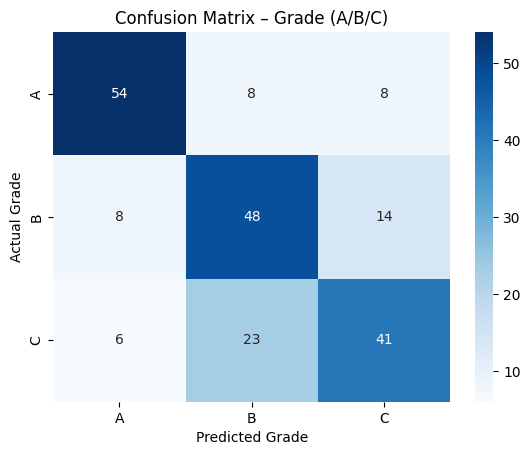

In [3]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Pastikan kamu sudah membaca CSV (atau jalankan labbeling.py dulu)
file_path = r"E:\DragonEye\dataset\graded_features.csv"
df = pd.read_csv(file_path)

# Debug: tampilkan kolom dan beberapa baris awal
print("File yang dibaca:", file_path)
print("Kolom yang ada:", df.columns.tolist())
print(df[['filename','label_asli','final_grade']].head())

# Pastikan kolom ada
for col in ["label_asli", "final_grade"]:
    if col not in df.columns:
        raise ValueError(f"Kolom '{col}' tidak ditemukan di CSV.")

# Ekstraksi grade dengan cara aman
# Jika label_asli sudah berupa 'A'/'B'/'C', ambil langsung; jika berformat lain, ambil token terakhir
def extract_true_grade(val):
    if pd.isna(val):
        return None
    s = str(val).strip().upper()
    parts = s.split()
    return parts[-1] if len(parts) >= 1 else None

def extract_pred_grade(val):
    if pd.isna(val):
        return None
    s = str(val).strip().upper()
    parts = s.split()
    # final_grade contohnya 'A' atau bisa jadi 'A (72.8)' tergantung format; ambil token pertama atau terakhir sesuai kebutuhan
    return parts[0] if len(parts) >= 1 else None

df['true_grade'] = df['label_asli'].apply(extract_true_grade)
df['pred_grade'] = df['final_grade'].apply(extract_pred_grade)

# Laporkan baris bermasalah (jika ada)
bad = df[df['true_grade'].isna() | df['pred_grade'].isna()]
if not bad.empty:
    print("Baris bermasalah (nilai kosong pada true/pred grade):")
    print(bad[['filename','label_asli','final_grade','true_grade','pred_grade']])
    # Jika ingin, inspect dulu dan perbaiki CSV atau format parsing

# Buat DF evaluasi hanya dari baris valid
df_eval = df.dropna(subset=['true_grade','pred_grade']).copy()

# Jika tidak ada baris valid, hentikan
if df_eval.empty:
    raise ValueError("Tidak ada baris valid untuk dievaluasi setelah ekstraksi grade.")

# Pastikan hanya huruf A/B/C (opsional)
df_eval = df_eval[df_eval['true_grade'].isin(['A','B','C'])]
df_eval = df_eval[df_eval['pred_grade'].isin(['A','B','C'])]

if df_eval.empty:
    raise ValueError("Tidak ada baris dengan grade A/B/C yang valid untuk dievaluasi.")

# Evaluasi
print("===== EVALUASI GRADE =====")
print("Jumlah baris dievaluasi:", len(df_eval))
print("Akurasi:", accuracy_score(df_eval['true_grade'], df_eval['pred_grade']))
print("\nClassification Report:\n", classification_report(df_eval['true_grade'], df_eval['pred_grade']))

cm = confusion_matrix(df_eval['true_grade'], df_eval['pred_grade'], labels=['A','B','C'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['A','B','C'], yticklabels=['A','B','C'])
plt.title("Confusion Matrix – Grade (A/B/C)")
plt.xlabel("Predicted Grade")
plt.ylabel("Actual Grade")
plt.show()


Distribusi Grade

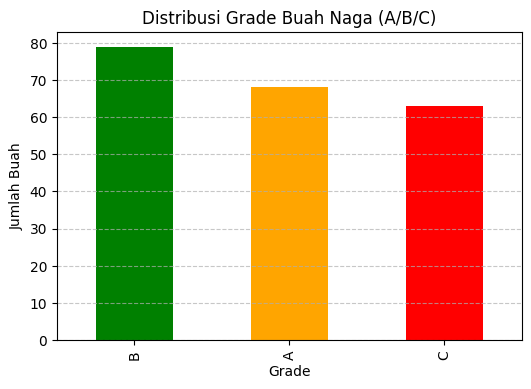

In [4]:
plt.figure(figsize=(6, 4))
df['pred_grade'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title("Distribusi Grade Buah Naga (A/B/C)")
plt.xlabel("Grade")
plt.ylabel("Jumlah Buah")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Visualisasi Sebaran Fitur

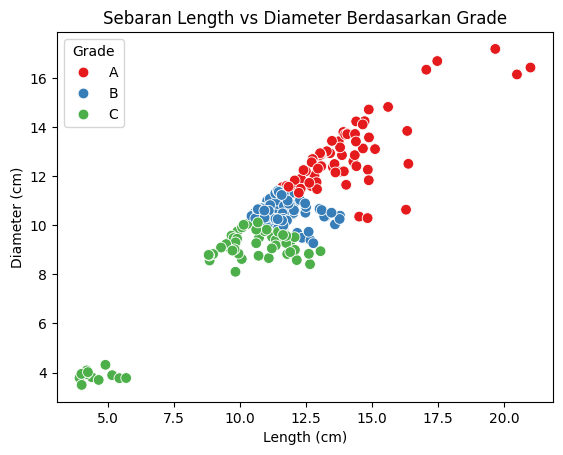

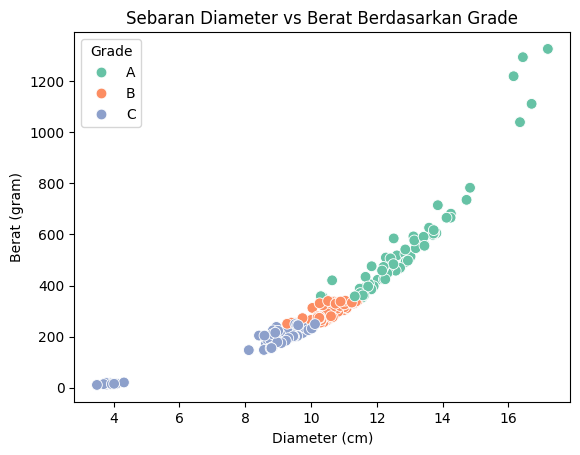

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan pred_grade ada (jika belum, buat dari final_grade seperti sebelumnya)
if 'pred_grade' not in df.columns:
    df['pred_grade'] = df['final_grade'].astype(str).str.split().str[0].str.upper()

# Pastikan kolom numerik benar-benar numeric
df['length_cm'] = pd.to_numeric(df['length_cm'], errors='coerce')
df['diameter_cm'] = pd.to_numeric(df['diameter_cm'], errors='coerce')
df['weight_est_g'] = pd.to_numeric(df['weight_est_g'], errors='coerce')

# Buang baris dengan nilai numerik NaN bila perlu
df_plot = df.dropna(subset=['length_cm','diameter_cm','weight_est_g','pred_grade']).copy()

# Plot 1: length_cm vs diameter_cm
sns.scatterplot(
    data=df_plot,
    x='length_cm',
    y='diameter_cm',
    hue='pred_grade',
    palette='Set1',
    s=60
)
plt.title("Sebaran Length vs Diameter Berdasarkan Grade")
plt.xlabel("Length (cm)")
plt.ylabel("Diameter (cm)")
plt.legend(title="Grade")
plt.show()

# Plot 2: diameter_cm vs weight_est_g
sns.scatterplot(
    data=df_plot,
    x='diameter_cm',
    y='weight_est_g',
    hue='pred_grade',
    palette='Set2',
    s=60
)
plt.title("Sebaran Diameter vs Berat Berdasarkan Grade")
plt.xlabel("Diameter (cm)")
plt.ylabel("Berat (gram)")
plt.legend(title="Grade")
plt.show()


Uji Hasil

In [ ]:
import pandas as pd
from ipywidgets import FileUpload, Output
from PIL import Image
import io
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

print("DragonEye Evaluator Loaded")

csv_path = r"E:\DragonEye\dataset\graded_features.csv"
df = pd.read_csv(csv_path)
df.columns = df.columns.str.strip()

for col in ["label_asli", "final_grade", "filename"]:
    if col not in df.columns:
        raise ValueError(f"Kolom '{col}' tidak ditemukan di CSV.")

df["true_grade"] = df["label_asli"].astype(str).str.strip().str.upper()
df["pred_grade"] = df["final_grade"].astype(str).str.upper().str.extract(r'([ABC])', expand=False)

print("Silakan upload satu gambar untuk dicek dalam dataset:")

# Buat widget baru (pastikan widget lama ditutup jika ada)
try:
    upload  # check if exists in namespace
    try:
        upload.close()   # tutup widget lama di frontend
    except Exception:
        pass
except NameError:
    pass

upload = FileUpload(accept='.jpg,.png,.jpeg', multiple=False)
out = Output()
display(upload, out)

_processed_once = False

def handle_upload(change):
    global _processed_once
    with out:
        out.clear_output(wait=True)
        try:
            if _processed_once:
                print("Sudah diproses — silakan buat upload baru jika ingin memeriksa gambar lain.")
                return

            if not upload.value:
                print("Tidak ada file yang diupload.")
                return

            # Ambil file pertama dari upload.value (bagaimanapun struktur-nya)
            if isinstance(upload.value, dict):
                first_key = next(iter(upload.value.keys()))
                file_info = upload.value[first_key]
                image_name = first_key
                image_bytes = file_info.get('content') or file_info.get('data') or file_info
            else:
                file_info = upload.value[0]
                image_name = file_info.get('name', 'uploaded_image')
                image_bytes = file_info.get('content') or file_info.get('data')

            if image_bytes is None:
                print("Gagal membaca isi file upload.")
                return

            # tampilkan gambar sekali
            img = Image.open(io.BytesIO(image_bytes)).convert("RGB")
            plt.figure(figsize=(4,4))
            plt.imshow(img)
            plt.axis('off')
            plt.title("Gambar Input")
            plt.show()

            print("File:", image_name)

            from predict_single import predict_single_image

            print("\nMemproses gambar baru...")

            # Simpan file upload sementara untuk diproses oleh pipeline
            TEMP_DIR = r"E:\DragonEye\temp"
            os.makedirs(TEMP_DIR, exist_ok=True)

            temp_path = os.path.join(TEMP_DIR, "temp_uploaded_image.jpg")
            with open(temp_path, "wb") as f:
                f.write(image_bytes)
            with open(temp_path, "wb") as f:
                f.write(image_bytes)

            # Jalankan pipeline lengkap (preprocessing → segmentasi → fitur → fuzzy)
            result, err = predict_single_image(temp_path)

            if err:
                print("Error:", err)
            else:
                print("\nHASIL ANALISIS GAMBAR (Pipeline Lengkap)")
                print("Prediksi Grade :", result["grade"])
                print("Akurasi Fuzzy  :", f"{result['score']:.1f}%")
                print("Panjang        :", f"{result['length']:.2f} cm")
                print("Diameter       :", f"{result['diameter']:.2f} cm")
                print("Berat Estimasi :", f"{result['weight']:.0f} g")
                print("Rasio L/D      :", f"{result['ratio']:.2f}")

            _processed_once = True

            # Hentikan widget dan bersihkan supaya tidak memicu lagi
            try:
                upload.close()
            except Exception:
                pass

        except Exception as e:
            print("Terjadi error saat memproses upload:", repr(e))

# pastikan handler lama di-unobserve dulu supaya tidak teregistrasi ganda
try:
    upload.unobserve(handle_upload, names='value')
except Exception:
    pass

upload.observe(handle_upload, names='value')


DragonEye Evaluator Loaded
Silakan upload satu gambar untuk dicek dalam dataset:


FileUpload(value=(), accept='.jpg,.png,.jpeg', description='Upload')

Output()